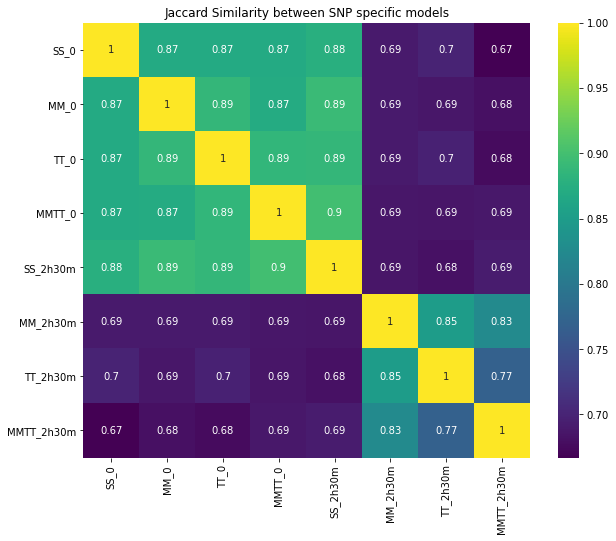

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Example DataFrame
data = pd.read_csv("rxns_t1_imat_protein.csv")

df = pd.DataFrame(data)

# Function to compute Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Create a Jaccard similarity matrix
columns = df.columns
jaccard_matrix = np.zeros((len(columns), len(columns)))

# Fill the matrix with Jaccard Index values
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i <= j:  # Calculate for upper triangle and diagonal
            set1 = set(df[col1].dropna())
            set2 = set(df[col2].dropna())
            jaccard_matrix[i, j] = jaccard_index(set1, set2)
            jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Symmetric matrix

jaccard_df = pd.DataFrame(jaccard_matrix, index=columns, columns=columns)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_df, annot=True, cmap='viridis')
plt.title('Jaccard Similarity between SNP specific models')
plt.savefig('D:/mauscript2/figures/figures_svg/supplementray/jaccard_similarity_heatmap.png', dpi=600)  # Save the figure with 600 dpi
plt.show()


In [ ]:
from cobra.io import load_matlab_model
from cobra.sampling import sample
from cobra.sampling import OptGPSampler
model_S_0 = load_matlab_model("S_0_imat_model_t1")
model_M_0 = load_matlab_model("M_0_imat_model_t1")
model_T_0 = load_matlab_model("T_0_imat_model_t1")
model_MT_0 = load_matlab_model("MT_0_imat_model_t1")
model_S_230 = load_matlab_model("S_230_imat_model_t1")
model_M_230 = load_matlab_model("M_230_imat_model_t1")
model_T_230 = load_matlab_model("T_230_imat_model_t1")
model_MT_230 = load_matlab_model("MT_230_imat_model_t1")

def opt_sampler(model, model_name):
    optgp_sampler = OptGPSampler(model, thinning=int(100), processes=10, seed=5)
    samples = optgp_sampler.sample(10000)
    samples.to_csv(f'samples_{model_name}_optgp.csv', index=False)

opt_sampler(model_S_0, "S_0")
opt_sampler(model_M_0, "M_0")
opt_sampler(model_T_0, "T_0")
opt_sampler(model_MT_0, "MT_0")
opt_sampler(model_S_230, "S_230")
opt_sampler(model_M_230, "M_230")
opt_sampler(model_T_230, "T_230")
opt_sampler(model_MT_230, "MT_230")

In [1]:
import pandas as pd
import os

In [2]:
filenames = os.listdir('D:/S_MMTT_analysis/protein_metabolic_models/protein_metabolic_models/optgp_sampling')

def extract_name_files(text):
  # Remove everything after the last dot (.)
  model_name = text.rsplit('.', 1)[0]
  return model_name

names_of_files = list(map(extract_name_files, filenames))


In [5]:
filenames

['samples_MT_0_optgp.csv',
 'samples_MT_230_optgp.csv',
 'samples_M_0_optgp.csv',
 'samples_M_230_optgp.csv',
 'samples_S_0_optgp.csv',
 'samples_S_230_optgp.csv',
 'samples_T_0_optgp.csv',
 'samples_T_230_optgp.csv']

In [11]:
print(names_of_files )

['samples_MT_0_optgp', 'samples_MT_230_optgp', 'samples_M_0_optgp', 'samples_M_230_optgp', 'samples_S_0_optgp', 'samples_S_230_optgp', 'samples_T_0_optgp', 'samples_T_230_optgp']


In [3]:
for i in range(0,len(names_of_files)): # saves each csv in a dataframe structure
     exec(names_of_files[i] + " = pd.read_csv(os.path.join('optgp_sampling', filenames[i])) ")

In [13]:
import numpy as np
# Create DataFrames with mean values
samples_MT_0_mean = pd.DataFrame({'MT_0_mean': samples_MT_0_optgp.mean(axis=0)})
samples_S_0_mean = pd.DataFrame({'S_0_mean': samples_S_0_optgp.mean(axis=0)})
samples_M_0_mean = pd.DataFrame({'M_0_mean': samples_M_0_optgp.mean(axis=0)})
samples_T_0_mean = pd.DataFrame({'T_0_mean': samples_T_0_optgp.mean(axis=0)})
samples_S_230_mean = pd.DataFrame({'S_230_mean': samples_S_230_optgp.mean(axis=0)})
samples_M_230_mean = pd.DataFrame({'M_230_mean': samples_M_230_optgp.mean(axis=0)})
samples_T_230_mean = pd.DataFrame({'T_230_mean': samples_T_230_optgp.mean(axis=0)})
samples_MT_230_mean = pd.DataFrame({'MT_230_mean': samples_MT_230_optgp.mean(axis=0)})


In [19]:
import numpy as np
# Create DataFrames with mean values
samples_MT_0_median = pd.DataFrame({'MT_0_median': samples_MT_0_optgp.median(axis=0)})

In [20]:
import numpy as np
# Create DataFrames with mean values
samples_MT_0_median = pd.DataFrame({'MT_0_median': samples_MT_0_optgp.median(axis=0)})
samples_S_0_median = pd.DataFrame({'S_0_median': samples_S_0_optgp.median(axis=0)})
samples_M_0_median = pd.DataFrame({'M_0_median': samples_M_0_optgp.median(axis=0)})
samples_T_0_median = pd.DataFrame({'T_0_median': samples_T_0_optgp.median(axis=0)})
samples_S_230_median= pd.DataFrame({'S_230_median': samples_S_230_optgp.median(axis=0)})
samples_M_230_median = pd.DataFrame({'M_230_median': samples_M_230_optgp.median(axis=0)})
samples_T_230_median = pd.DataFrame({'T_230_median': samples_T_230_optgp.median(axis=0)})
samples_MT_230_median = pd.DataFrame({'MT_230_median': samples_MT_230_optgp.median(axis=0)})


In [24]:
merged_df_median = pd.concat([samples_MT_0_median, samples_S_0_median, samples_M_0_median, samples_T_0_median, samples_S_230_median, samples_M_230_median, samples_T_230_median, samples_MT_230_median], axis=1, join='inner')

In [25]:
merged_df_median.to_csv('mean__union_median.csv')

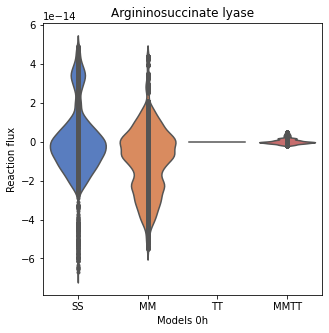

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import seaborn as sns

p = samples_S_0_optgp['r_0207']
x = samples_M_0_optgp['r_0207']
y = samples_T_0_optgp['r_0207']
z = samples_MT_0_optgp['r_0207']


# Combine the data and create labels
data = [p,x, y, z]
labels = ['SS', 'MM', 'TT', 'MMTT']

# Create a violin plot with separate violins for each dataset
plt.figure(figsize=(5, 5))
sns.violinplot(data=data, inner="points", palette="muted", scale="width")

# Add labels and title
plt.xlabel('Models 0h')
plt.ylabel('Reaction flux')
plt.title('Argininosuccinate lyase')

# Set the x-axis labels
plt.xticks(np.arange(len(labels)), labels)
save_path = 'D:/mauscript2/figures/figures_svg/supplementray/arg_4_flux_0h.png'
plt.savefig(save_path, dpi=600, bbox_inches='tight', format='png')
# Show the plot
plt.show()

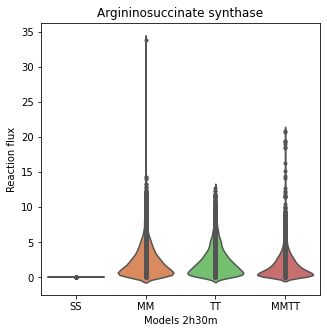

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import seaborn as sns

p = samples_S_230_optgp['r_0208']
x = samples_M_230_optgp['r_0208']
y = samples_T_230_optgp['r_0208']
z = samples_MT_230_optgp['r_0208']


# Combine the data and create labels
data = [p,x, y, z]
labels = ['SS', 'MM', 'TT', 'MMTT']

# Create a violin plot with separate violins for each dataset
plt.figure(figsize=(5, 5))
sns.violinplot(data=data, inner="points", palette="muted", scale="width")

# Add labels and title
plt.xlabel('Models 2h30m')
plt.ylabel('Reaction flux')
plt.title('Argininosuccinate synthase')

# Set the x-axis labels
plt.xticks(np.arange(len(labels)), labels)
save_path = 'D:/mauscript2/figures/figures_svg/supplementray/argininosuccinate_synthase_flux_2h30m.png'
plt.savefig(save_path, dpi=600, bbox_inches='tight', format='png')
# Show the plot
plt.show()

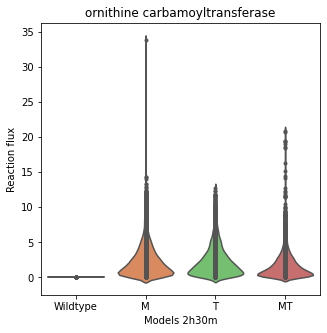

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import seaborn as sns

p = samples_S_230_optgp['r_0816']
x = samples_M_230_optgp['r_0816']
y = samples_T_230_optgp['r_0816']
z = samples_MT_230_optgp['r_0816']


# Combine the data and create labels
data = [p,x, y, z]
labels = ['Wildtype', 'M', 'T', 'MT']

# Create a violin plot with separate violins for each dataset
plt.figure(figsize=(5, 5))
sns.violinplot(data=data, inner="points", palette="muted", scale="width")

# Add labels and title
plt.xlabel('Models 2h30m')
plt.ylabel('Reaction flux')
plt.title('ornithine carbamoyltransferase')

# Set the x-axis labels
plt.xticks(np.arange(len(labels)), labels)
save_path = 'D:/S_MMTT_analysis/protein_metabolic_models/protein_metabolic_models/ornithine carbamoyltransferase_flux_2h30m.png'
plt.savefig(save_path, dpi=600, bbox_inches='tight', format='png')
# Show the plot
plt.show()

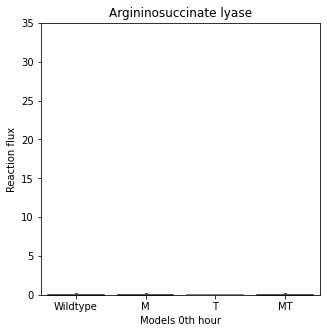

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import seaborn as sns

p = samples_S_0_optgp['r_0207']
x = samples_M_0_optgp['r_0207']
y = samples_T_0_optgp['r_0207']
z = samples_MT_0_optgp['r_0207']


# Combine the data and create labels
data = [p,x, y, z]
labels = ['Wildtype', 'M', 'T', 'MT']

# Create a violin plot with separate violins for each dataset
plt.figure(figsize=(5, 5))
sns.violinplot(data=data, inner="points", palette="muted", scale="width")

# Add labels and title
plt.xlabel('Models 0th hour')
plt.ylabel('Reaction flux')
plt.title('Argininosuccinate lyase')

# Set the x-axis labels
plt.xticks(np.arange(len(labels)), labels)
plt.ylim(0, 35)
save_path = 'D:/S_MMTT_analysis/protein_metabolic_models/protein_metabolic_models/arg_4_flux_0h.png'
plt.savefig(save_path, dpi=600, format='png')
# Show the plot
plt.show()

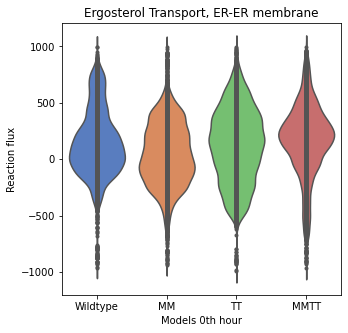

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract reaction fluxes
p = samples_S_0_optgp.get('r_3939', [0])  # Defaulting to 0 if key doesn't exist
x = samples_M_0_optgp.get('r_3939', [0])
y = samples_T_0_optgp.get('r_3939', [0])
z = samples_MT_0_optgp.get('r_3939', [0])

# Combine the data and create labels
data = [p, x, y, z]
labels = ['Wildtype', 'MM', 'TT', 'MMTT']

# Create the boxplot
plt.figure(figsize=(5, 5))
sns.violinplot(data=data, inner="points", palette="muted", scale="width")

# Add labels and title
plt.xlabel('Models 0th hour')
plt.ylabel('Reaction flux')
plt.title('Ergosterol Transport, ER-ER membrane')

# Set the x-axis labels
plt.xticks(np.arange(len(labels)), labels)

# Save and show the plot
save_path = 'D:/mauscript2/figures/figures_svg/supplementray/ergosterol_transport_h.png'
plt.savefig(save_path, dpi=600, format='png')
plt.show()


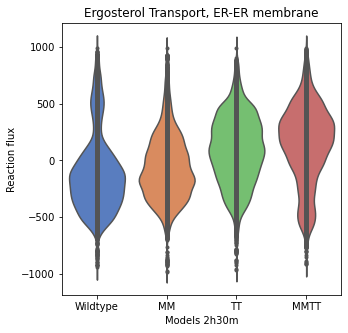

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract reaction fluxes
p = samples_S_230_optgp.get('r_3939', [0])  
x = samples_M_230_optgp.get('r_3939', [0])
y = samples_T_230_optgp.get('r_3939', [0])
z = samples_MT_230_optgp.get('r_3939', [0])

# Combine the data and create labels
data = [p, x, y, z]
labels = ['Wildtype', 'MM', 'TT', 'MMTT']

# Create the boxplot
plt.figure(figsize=(5, 5))
sns.violinplot(data=data, inner="points", palette="muted", scale="width")

# Add labels and title
plt.xlabel('Models 2h30m')
plt.ylabel('Reaction flux')
plt.title('Ergosterol Transport, ER-ER membrane')

# Set the x-axis labels
plt.xticks(np.arange(len(labels)), labels)

# Save and show the plot
save_path = 'D:/mauscript2/figures/figures_svg/supplementray/ergosterol_transport_2h30m.png'
plt.savefig(save_path, dpi=600, format='png')
plt.show()


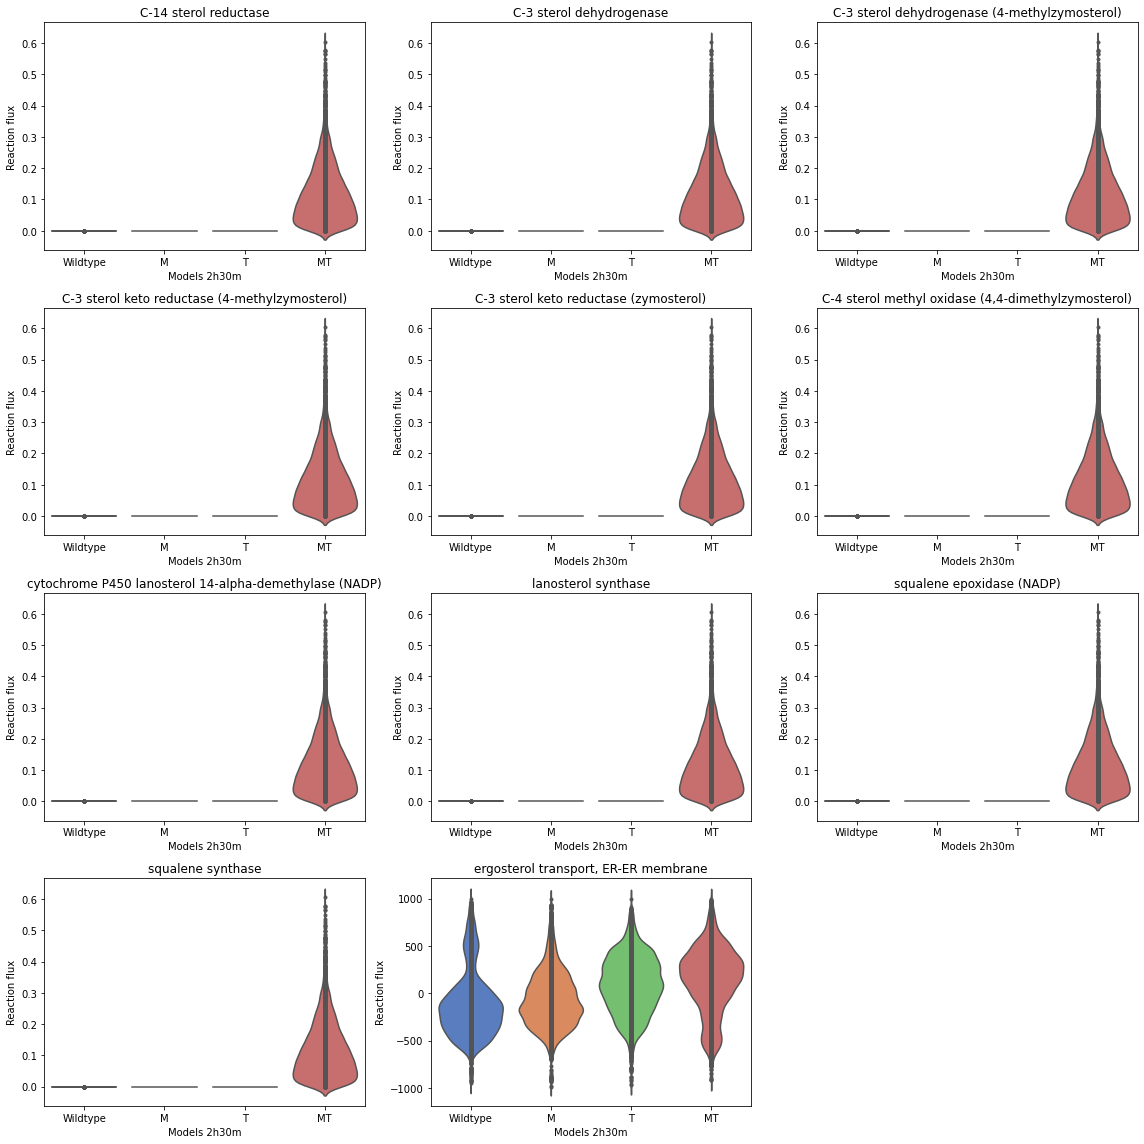

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, kruskal
import seaborn as sns

# Your reaction list and names
rxns = ['r_0231', 'r_0234', 'r_0235', 'r_0236', 'r_0237', 'r_0241', 
        'r_0317', 'r_0698', 'r_1011', 'r_1012', 'r_3939']

rxnNames = ['C-14 sterol reductase',
            'C-3 sterol dehydrogenase',
            'C-3 sterol dehydrogenase (4-methylzymosterol)',
            'C-3 sterol keto reductase (4-methylzymosterol)',
            'C-3 sterol keto reductase (zymosterol)',
            'C-4 sterol methyl oxidase (4,4-dimethylzymosterol)',
            'cytochrome P450 lanosterol 14-alpha-demethylase (NADP)',
            'lanosterol synthase',
            'squalene epoxidase (NADP)',
            'squalene synthase', 
            'ergosterol transport, ER-ER membrane']

# Initialize a larger figure for the grid of plots
plt.figure(figsize=(16, 16))

# Loop over each reaction to generate plots
for i, rxn in enumerate(rxns):
    plt.subplot(4, 3, i + 1)  # 4x4 grid
    
    # Check if the reaction exists in each dataset; if not, use 0
    p = samples_S_230_optgp.get(rxn, [0] * 10)  # Assuming 10 values, adjust as per your dataset
    x = samples_M_230_optgp.get(rxn, [0] * 10)
    y = samples_T_230_optgp.get(rxn, [0] * 10)
    z = samples_MT_230_optgp.get(rxn, [0] * 10)
    
    # Combine the data and create labels
    data = [p, x, y, z]
    labels = ['Wildtype', 'M', 'T', 'MT']

    # Create the violin plot
    sns.violinplot(data=data, inner="points", palette="muted", scale="width")

    # Add labels and title for each subplot
    plt.xlabel('Models 2h30m')
    plt.ylabel('Reaction flux')
    plt.title(rxnNames[i])

    # Set the x-axis labels
    plt.xticks(np.arange(len(labels)), labels)

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the entire figure
save_path = 'D:/mauscript2/figures/figures_svg/supplementray/reaction_flux_grid.png'
plt.savefig(save_path, dpi=600, bbox_inches='tight', format='png')

# Show the figure with all plots
plt.show()


C:\Users\srijith\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


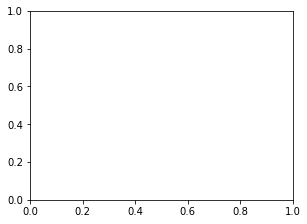

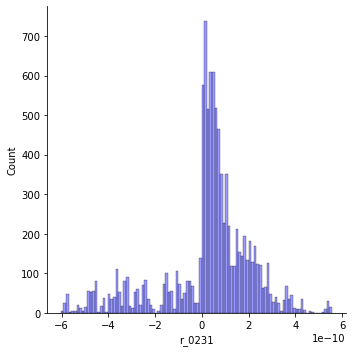

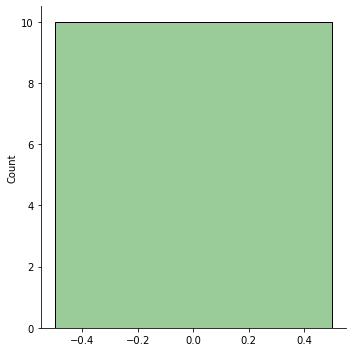

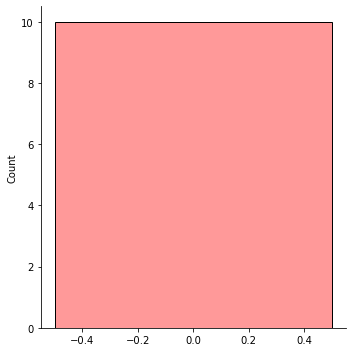

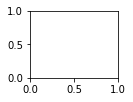

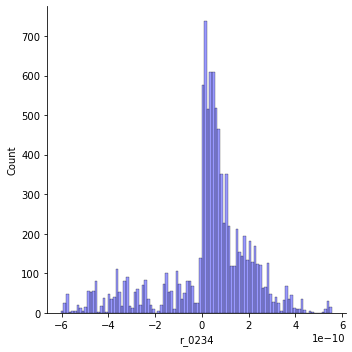

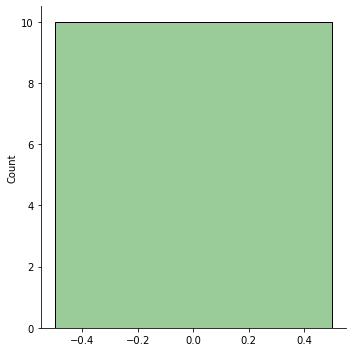

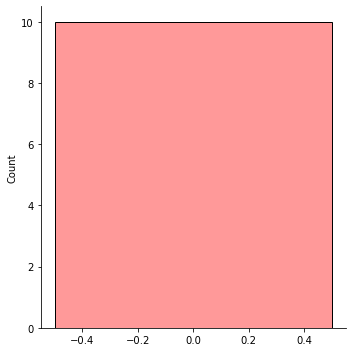

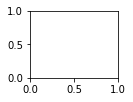

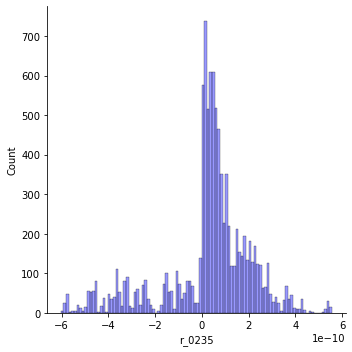

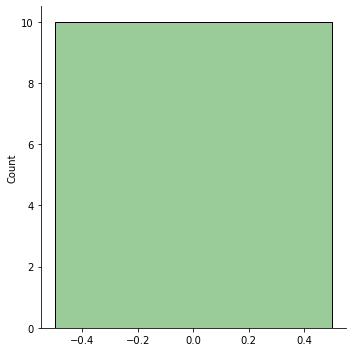

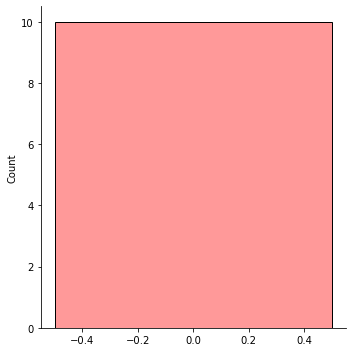

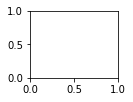

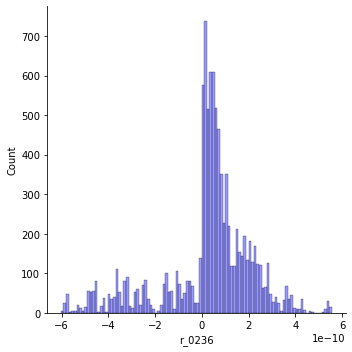

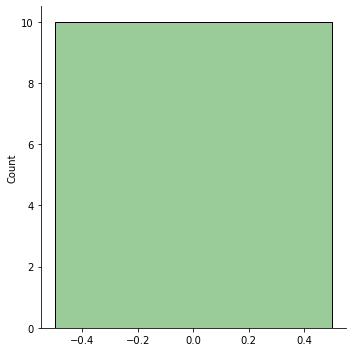

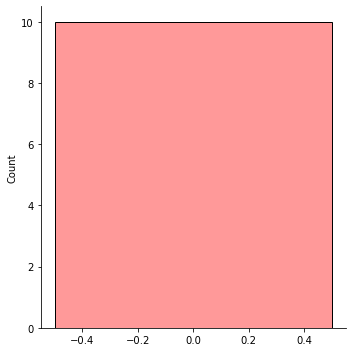

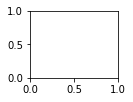

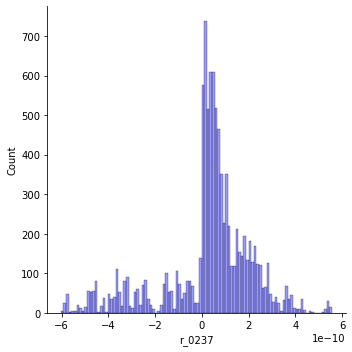

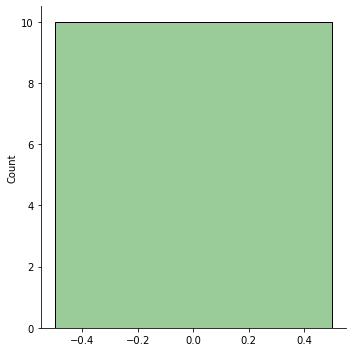

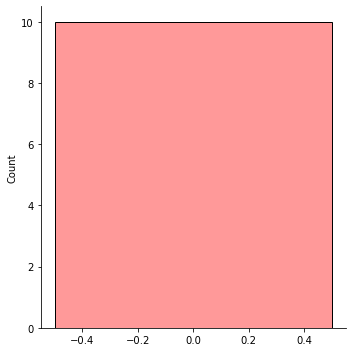

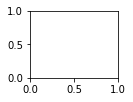

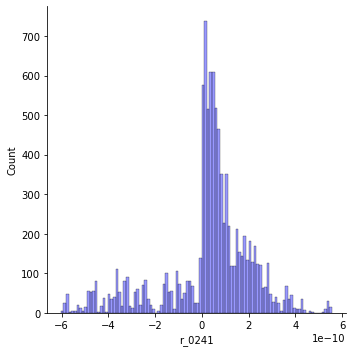

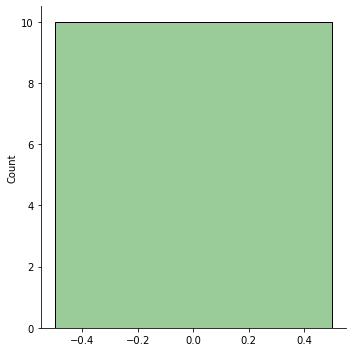

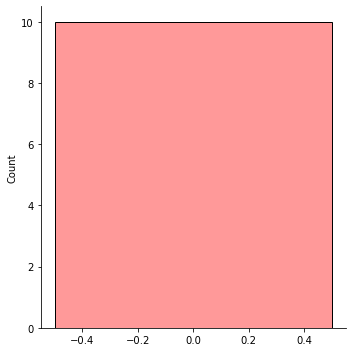

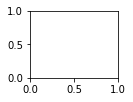

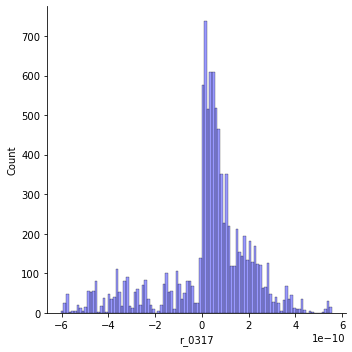

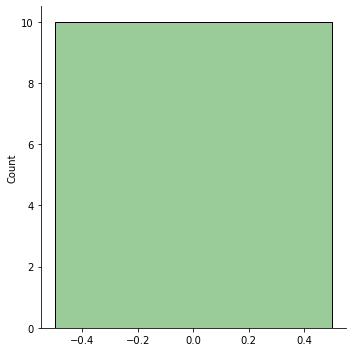

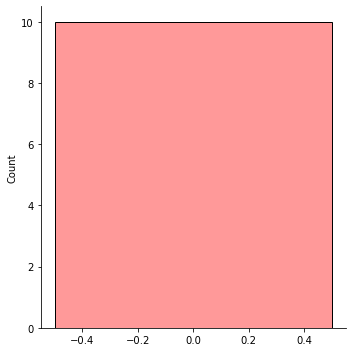

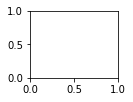

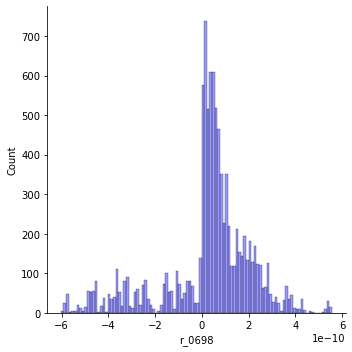

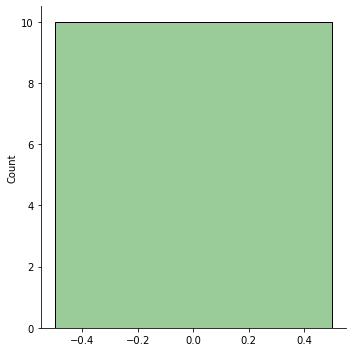

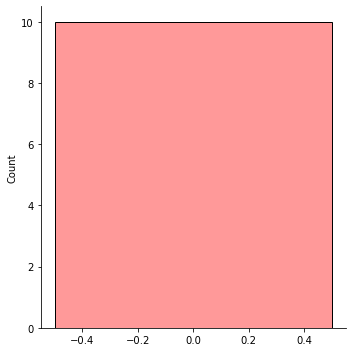

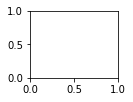

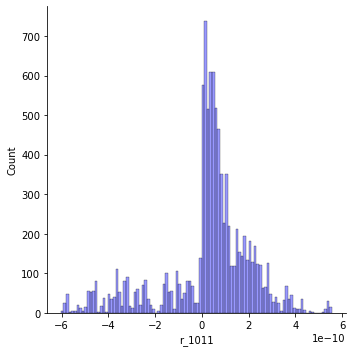

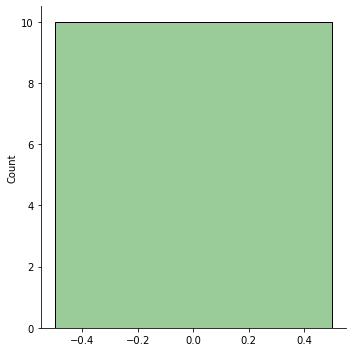

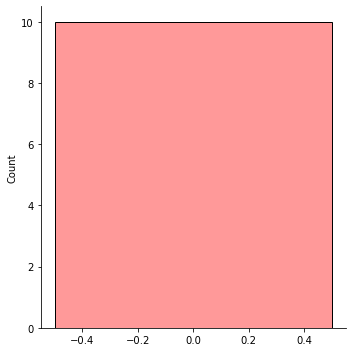

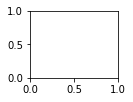

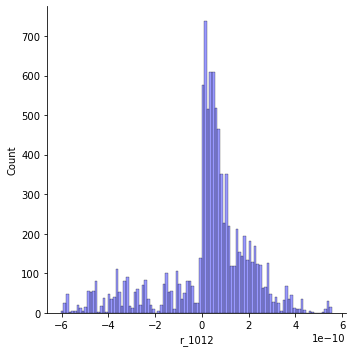

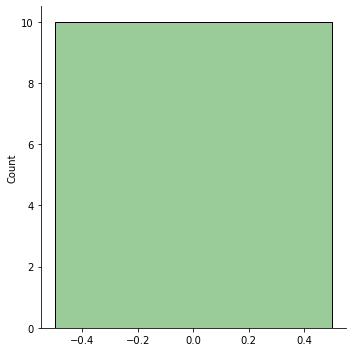

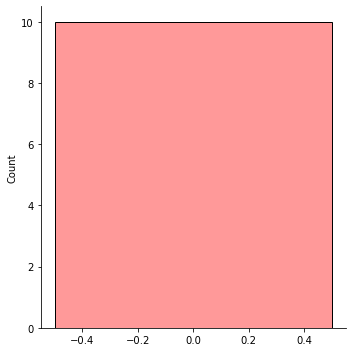

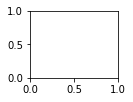

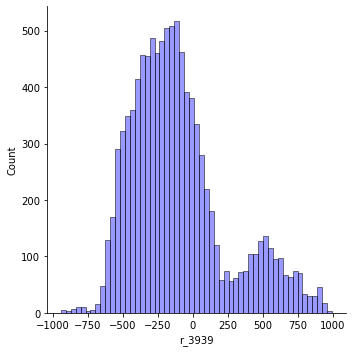

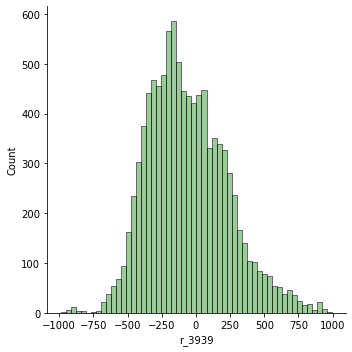

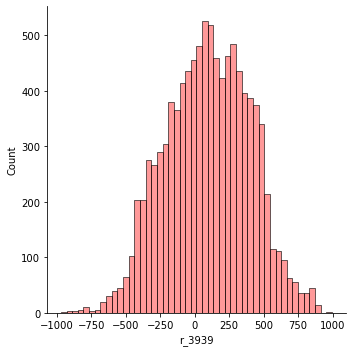

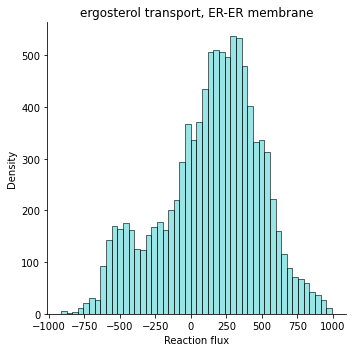

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your reaction list and names
rxns = ['r_0231', 'r_0234', 'r_0235', 'r_0236', 'r_0237', 'r_0241', 
        'r_0317', 'r_0698', 'r_1011', 'r_1012', 'r_3939']

rxnNames = ['C-14 sterol reductase',
            'C-3 sterol dehydrogenase',
            'C-3 sterol dehydrogenase (4-methylzymosterol)',
            'C-3 sterol keto reductase (4-methylzymosterol)',
            'C-3 sterol keto reductase (zymosterol)',
            'C-4 sterol methyl oxidase (4,4-dimethylzymosterol)',
            'cytochrome P450 lanosterol 14-alpha-demethylase (NADP)',
            'lanosterol synthase',
            'squalene epoxidase (NADP)',
            'squalene synthase', 
            'ergosterol transport, ER-ER membrane']

# Initialize a larger figure for the grid of plots
plt.figure(figsize=(16, 16))

# Loop over each reaction to generate density plots
for i, rxn in enumerate(rxns):
    plt.subplot(4, 3, i + 1)  # 4x3 grid
    
    # Check if the reaction exists in each dataset; if not, use 0
    p = samples_S_230_optgp.get(rxn, [0] * 10)  # Replace with actual data
    x = samples_M_230_optgp.get(rxn, [0] * 10)
    y = samples_T_230_optgp.get(rxn, [0] * 10)
    z = samples_MT_230_optgp.get(rxn, [0] * 10)
    
    # Plot density for each group
    sns.displot(p, label='SS', color='b', fill=True, alpha=0.4)
    sns.displot(x, label='MM', color='g', fill=True, alpha=0.4)
    sns.displot(y, label='TT', color='r', fill=True, alpha=0.4)
    sns.displot(z, label='MMTT', color='c', fill=True, alpha=0.4)

    # Add labels and title for each subplot
    plt.xlabel('Reaction flux')
    plt.ylabel('Density')
    plt.title(rxnNames[i])
    
    # Show the legend only once, for the first subplot
    if i == 0:
        plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure
save_path = 'D:/mauscript2/figures/figures_svg/supplementray/reaction_flux_density_grid.png'
plt.savefig(save_path, dpi=600, format='png')

# Show the figure
plt.show()


In [8]:
import pandas as pd

# Define the genotypes as a list of strings
Genotype = ['M', 'T', 'MT']

# Loop through each genotype and perform the operations
for i in Genotype:
    # Merge the dataframes
    merged = pd.merge(globals()[f'samples_{i}_230_mean'], samples_S_230_mean, left_index=True, right_index=True)
    
    # Calculate the flux change
    merged['flux_change'] = (merged.iloc[:, 0] - merged.iloc[:, 1]) / abs((merged.iloc[:, 0] + merged.iloc[:, 1]))
    
    # Filter the rows where flux change is greater than 0.82
    final = merged[merged['flux_change'] > 0.82]
    
    # Save the result to a CSV file
    final.to_csv(f'sample_{i}_230_diff_abs.csv')


In [11]:
import os
from scipy import stats
for i in Genotype:
    C= pd.read_csv(f'sample_{i}_230_diff_abs.csv')
    reactions = C["Unnamed: 0"]
    value = []
    for j in range(len(reactions)): 
        x = globals()['samples_%s_230_optgp' % i][reactions[j]]
        y = samples_S_230_optgp[reactions[j]]
        p = stats.ks_2samp(x, y)
        value.append(p)
    C['p_value'] = value
    C.to_csv("C_%s_S_diff_p_abs.csv" % i)

In [16]:
def fdr(p_vals):

    from scipy.stats import rankdata
    ranked_p_values = rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1

    return fdr

In [8]:
Genotype = ['M', 'T', 'MT']
import pandas as pd
for i in Genotype:
    C= pd.read_csv(f'C_{i}_S_diff_p_abs.csv')
    C['adjp_value'] = fdr(C["p_value"])
    C.to_csv("C_%s_S_diff_padj_abs_230.csv" % i)

# 0th hour

In [14]:
import pandas as pd

# Define the genotypes as a list of strings
Genotype = ['M', 'T', 'MT']

# Loop through each genotype and perform the operations
for i in Genotype:
    # Merge the dataframes
    merged = pd.merge(globals()[f'samples_{i}_0_mean'], samples_S_0_mean, left_index=True, right_index=True)
    
    # Calculate the flux change
    merged['flux_change'] = (merged.iloc[:, 0] - merged.iloc[:, 1]) / abs((merged.iloc[:, 0] + merged.iloc[:, 1]))
    
    # Filter the rows where flux change is greater than 0.82
    final = merged[merged['flux_change'] > 0.82]
    
    # Save the result to a CSV file
    final.to_csv(f'sample_{i}_0_diff_abs.csv')


In [15]:
import os
from scipy import stats
for i in Genotype:
    C= pd.read_csv(f'sample_{i}_0_diff_abs.csv')
    reactions = C["Unnamed: 0"]
    value = []
    for j in range(len(reactions)): 
        x = globals()['samples_%s_0_optgp' % i][reactions[j]]
        y = samples_S_0_optgp[reactions[j]]
        p = stats.ks_2samp(x, y)
        value.append(p)
    C['p_value'] = value
    C.to_csv("C_%s_S_diff_p_abs_0.csv" % i)

In [18]:
Genotype = ['M', 'T', 'MT']
import pandas as pd
for i in Genotype:
    C= pd.read_csv(f'C_{i}_S_diff_p_abs_0.csv')
    C['adjp_value'] = fdr(C["p_value"])
    C.to_csv("C_%s_S_diff_padj_abs_0.csv" % i)